# Application of Fuzzy logic and Genetic Algorithm in Stock Trading

This notebook explores the application of genetic algorithms in optimizing the fuzzy rules as applied in technical analysis of stocks.

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from Genome import Genome
from Population import Population
from Fitness import evaluate_fitness, test_fitness
from Base_genome import base_genome
from Seed_genome import seed_genome
from helper_module import split_train_test_sets, split_train_set
from Evolution import Evolution

                Close       Open       High        Low   Volume
Date                                                           
1986-01-02   172.6575   172.6575   172.6575   172.6575    600.0
1986-01-03   172.6575   172.6575   172.6575   172.6575   1900.0
1986-01-06   175.4879   175.4879   175.4879   175.4879   2800.0
1986-01-07   181.1488   175.4879   181.1488   175.4879   3200.0
1986-01-09   181.1488   181.1488   181.1488   181.1488   2600.0
...               ...        ...        ...        ...      ...
2023-09-12  1781.0000  1786.0000  1809.0000  1781.0000  12985.0
2023-09-13  1787.0000  1799.0000  1799.0000  1781.0000  16850.0
2023-09-14  1795.0000  1795.0000  1795.0000  1782.0000  12070.0
2023-09-15  1752.0000  1795.0000  1810.0000  1752.0000  29105.0
2023-09-18  1752.0000  1789.0000  1789.0000  1752.0000  27225.0

[8861 rows x 5 columns]


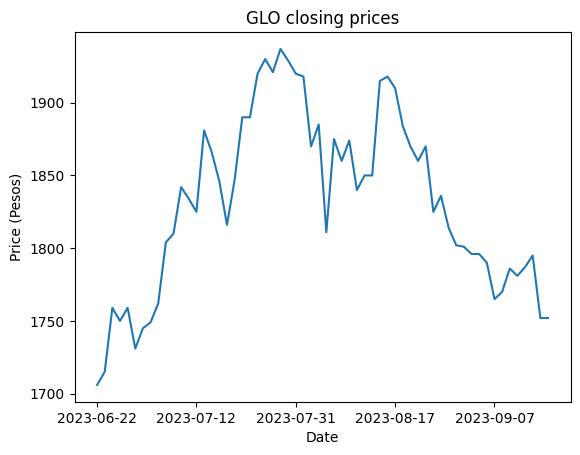

In [2]:
# read and print sample historical stock price data
series = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/GLO.csv', header = 0, index_col = 'Date')
print(series)

# plot historical stock price data
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Pesos)')
ax.plot(series['Close'].tail(60))
ax.set_xticks(ax.get_xticks()[::13])
plt.show()

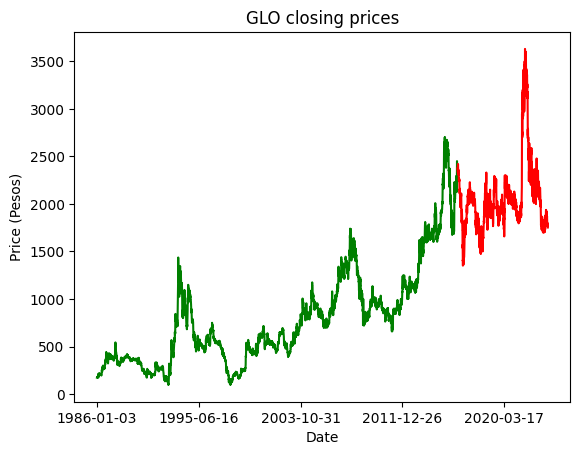

In [3]:
# split data into train and test sets
train, test = split_train_test_sets(series)

# plot the train and test sets
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Pesos)')
ax.plot(train['Close'], 'g')
ax.plot(test['Close'], 'r')
ax.set_xticks(ax.get_xticks()[::2000])
plt.show()

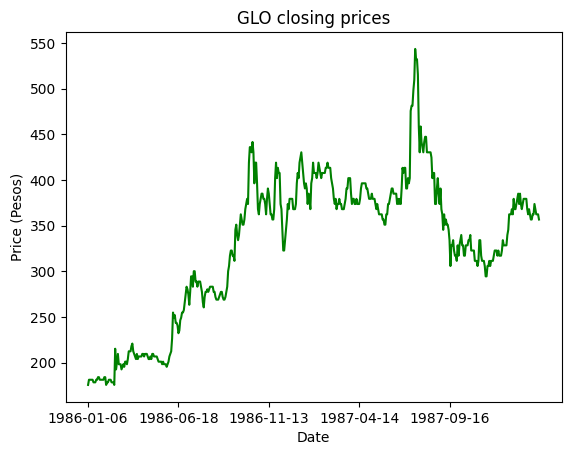

In [4]:
# split the train set into multiple batches
train_set = split_train_set(train)

# plot a sample of the train set
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Pesos)')
ax.plot(train_set[1]['Close'], 'g')
ax.set_xticks(ax.get_xticks()[::100])
plt.show()

In [5]:
if __name__ == "__main__":
    NUM_SEED_GENOMES = 25
    NUM_BASE_GENOMES = 75
    SEED_GENOME = Genome(seed_genome())
    BASE_GENOME = Genome(base_genome())  
    population = Population()
    population.seed_population(seed_genome = SEED_GENOME, num_seeds = NUM_SEED_GENOMES)
    population.add_and_initialize_to_population(base_genome = BASE_GENOME, num_genomes = NUM_BASE_GENOMES)  
    evolution = Evolution(population = population)
    evolution.define_fitness_func(fitness_func = evaluate_fitness)
    evolution.define_train_set(train_set = train_set)
    new_population = evolution.run(num_generations=500)

Generation 0
fitness of generation 0:	1.714531302477074
Generation 1
fitness of generation 1:	7.329567090652704
Generation 2
fitness of generation 2:	21.052692072697862
Generation 3
fitness of generation 3:	2.788305380738958
Generation 4
fitness of generation 4:	8.325895856328208
Generation 5
fitness of generation 5:	6.112003335357147
Generation 6
fitness of generation 6:	4.118517601921506
Generation 7
fitness of generation 7:	5.172643965004955
Generation 8
fitness of generation 8:	6.042493834545428
Generation 9
fitness of generation 9:	5.477090179038133
Generation 10
fitness of generation 10:	8.672962001562617
Generation 11
fitness of generation 11:	312.8138896735053
Generation 12
fitness of generation 12:	5.265209874729474
Generation 13
fitness of generation 13:	12.404668695206846
Generation 14
fitness of generation 14:	4.063698004032126
Generation 15
fitness of generation 15:	36.32767716313102
Generation 16
fitness of generation 16:	5.560491732704018
Generation 17
fitness of generat

In [6]:
series_JFC = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/JFC.csv', header = 0, index_col = 'Date')
series_CEB = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/CEB.csv', header = 0, index_col = 'Date')
series_GTCAP = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/GTCAP.csv', header = 0, index_col = 'Date')
series_AEV = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/AEV.csv', header = 0, index_col = 'Date')
series_BPI = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/BPI.csv', header = 0, index_col = 'Date')

GENE_ID: 25176
Gene name: RSI_window
Value: 239

Gene name: RSI_p1
Value: 0.7252370054435421

Gene name: RSI_p2
Value: -0.4158374553341083

Gene name: RSI_p3
Value: -0.48072386418427426

Gene name: RSI_p4
Value: 0.26629402502813804

Gene name: RSI_low_membership
Value: [71.0556044262619, 90.5654428533467]

Gene name: RSI_middle_membership
Value: [20.53268340802161, 45.45695902605522, 74.51498288385393]

Gene name: RSI_high_membership
Value: [60.23398542978319, 83.8039510842202]

Gene name: entry_condition
Value: [12.967663754307875, 21.484117535826357]

Gene name: stop_loss
Value: 0.8260990935689019

Gene name: z_rolling_window
Value: 224




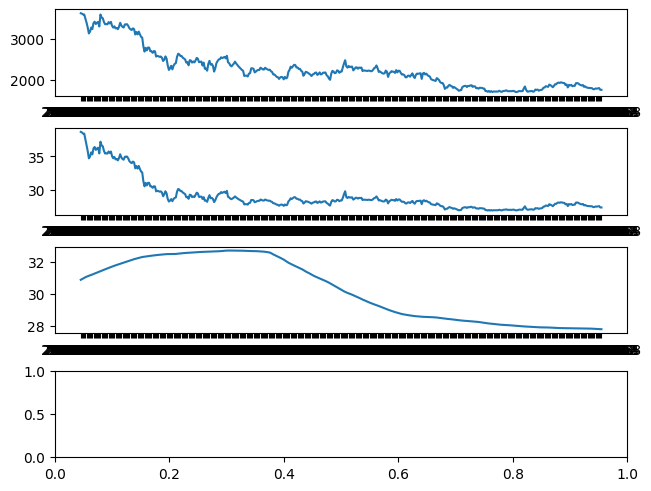

1


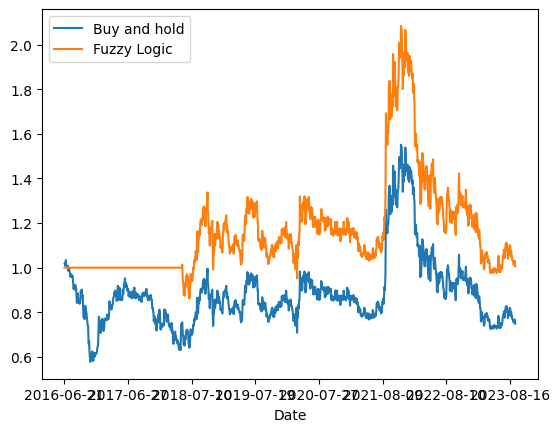

In [12]:
# print(population.population[25])
print(evolution.population.population[99])
fitness, num_trades = test_fitness(genome = new_population .population[99], series = test)
print(num_trades)